# **Uploading dataset from Gogle Drive**

As a dataset was choosen Kvasir-SEG, the one for gastrointestinal polyp segmentation:
https://paperswithcode.com/dataset/kvasir-seg.

In [ ]:
!conda install -y gdown

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.3
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.12.4            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-4.7.1                |     pyhd8ed1ab_0          19 KB  conda-forge
    openssl-3.1.3              |       hd590300_0         2.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.6 MB

The following NEW packages will be INSTA

In [ ]:
!gdown --id 1whjrUBiPvuLzN_jBPSIBgpHFNnKitrx4

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1whjrUBiPvuLzN_jBPSIBgpHFNnKitrx4
From (redirected): https://drive.google.com/uc?id=1whjrUBiPvuLzN_jBPSIBgpHFNnKitrx4&confirm=t&uuid=ccaeefc1-cd18-4f70-9caa-ceae1be44dd4
To: /kaggle/working/Kvasir-SEG.zip
100%|██████████████████████████████████████| 46.0M/46.0M [00:02<00:00, 21.2MB/s]


In [ ]:
! unzip /kaggle/working/Kvasir-SEG.zip

Archive:  /kaggle/working/Kvasir-SEG.zip
   creating: images/
  inflating: images/cju0qkwl35piu0993l0dewei2.jpg  
  inflating: images/cju0qoxqj9q6s0835b43399p4.jpg  
  inflating: images/cju0qx73cjw570799j4n5cjze.jpg  
  inflating: images/cju0roawvklrq0799vmjorwfv.jpg  
  inflating: images/cju0rx1idathl0835detmsp84.jpg  
  inflating: images/cju0s2a9ekvms080138tjjpxr.jpg  
  inflating: images/cju0s690hkp960855tjuaqvv0.jpg  
  inflating: images/cju0sr5ghl0nd08789uzf1raf.jpg  
  inflating: images/cju0sxqiclckk08551ycbwhno.jpg  
  inflating: images/cju0t4oil7vzk099370nun5h9.jpg  
  inflating: images/cju0tl3uz8blh0993wxvn7ly3.jpg  
  inflating: images/cju0u2g7pmnux0801vkk47ivj.jpg  
  inflating: images/cju0u82z3cuma0835wlxrnrjv.jpg  
  inflating: images/cju0ue769mxii08019zqgdbxn.jpg  
  inflating: images/cju0vtox5ain6099360pu62rp.jpg  
  inflating: images/cju13cgqmnhwn0988yrainhcp.jpg  
  inflating: images/cju13fwthn9mq0835gacxgy01.jpg  
  inflating: images/cju13hp5rnbjx0835bf0jowgx.jpg  
  

# **Importing all the necessary libraries**

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os

# **Saving images and masks into arrays**

In [ ]:
img_size=128
n=1000
images=np.zeros(shape=(n,img_size,img_size,3),dtype='uint8')
masks=np.zeros(shape=(n,img_size,img_size),dtype='uint8')
path1='/kaggle/working/images'
path2='/kaggle/working/masks'
i=0
for names in os.listdir(path1):
  img=cv2.imread(path1+'/'+names)
  img=cv2.resize(img,(img_size,img_size))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images[i]=img
  mask=cv2.imread(path2+'/'+names,0)
  mask=cv2.resize(mask,(img_size,img_size))
  masks[i]=mask
  i+=1
print(images.shape)
print(masks.shape)

(1000, 128, 128, 3)
(1000, 128, 128)


# **Showing image and it's mask from the dataset**

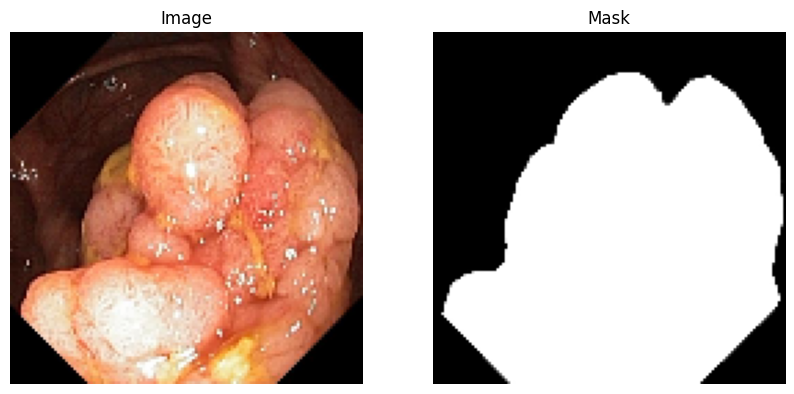

In [ ]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1,2,1)
ax1.axis('off')
ax1.set_title('Image')
ax1.imshow(images[0])
ax2=fig.add_subplot(1,2,2)
ax2.axis('off')
ax2.set_title('Mask')
ax2.imshow(masks[0],cmap='gray')
plt.show()

# **Splitting dataset into train,test and validation samples**

In [ ]:
images_train,images_test,masks_train,masks_test=train_test_split(images,masks,train_size=0.9,random_state=1)
images_val,images_test,masks_val,masks_test=train_test_split(images_test,masks_test,test_size=0.5,random_state=1)
print(images_train.shape)
print(masks_train.shape)
print(images_val.shape)
print(masks_val.shape)
print(images_test.shape)
print(masks_test.shape)
masks_val[masks_val>0]=1
masks_test[masks_test>0]=1

(900, 128, 128, 3)
(900, 128, 128)
(50, 128, 128, 3)
(50, 128, 128)
(50, 128, 128, 3)
(50, 128, 128)


# **Applying and visualizing some data augmentation for train sample**

In [ ]:
def zoom_image(image,margin1,margin2):
    image=image[margin1:img_size-margin1,margin2:img_size-margin2]
    image=cv2.resize(image,(img_size,img_size))
    return image

In [ ]:
def rotate_image(image,angel,direction):
    (h,w) = image.shape[:2]
    rot_mat = cv2.getRotationMatrix2D((h/2,w/2), angel, direction)
    result = cv2.warpAffine(src=image, M=rot_mat, dsize=(h,w), flags=cv2.INTER_LINEAR)
    return result

In [ ]:
n_=images_train.copy().shape[0]
images_train=np.append(images_train,np.array([cv2.flip(image,1) for image in images_train]),axis=0)
masks_train=np.append(masks_train,np.array([cv2.flip(mask,1) for mask in masks_train]),axis=0)
images_train=np.append(images_train,np.array([cv2.flip(image,0) for image in images_train]),axis=0)
masks_train=np.append(masks_train,np.array([cv2.flip(mask,0) for mask in masks_train]),axis=0)
images_train=np.append(images_train,np.array([cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE) for image in images_train]),axis=0)
masks_train=np.append(masks_train,np.array([cv2.rotate(mask,cv2.ROTATE_90_CLOCKWISE) for mask in masks_train]),axis=0)
images_train=np.append(images_train,np.array([rotate_image(image,10,1) for image in images_train]),axis=0)
masks_train=np.append(masks_train,np.array([rotate_image(mask,10,1) for mask in masks_train]),axis=0)
images_train=np.append(images_train,np.array([zoom_image(image,10,10) for image in images_train]),axis=0)
masks_train=np.append(masks_train,np.array([zoom_image(mask,10,10) for mask in masks_train]),axis=0)
images_train=np.append(images_train,np.array([zoom_image(image,20,20) for image in images_train]),axis=0)
masks_train=np.append(masks_train,np.array([zoom_image(mask,20,20) for mask in masks_train]),axis=0)
images_train=np.append(images_train,np.array([rotate_image(image,40,1) for image in images_train[::2,:,:,:]]),axis=0)
masks_train=np.append(masks_train,np.array([rotate_image(mask,40,1) for mask in masks_train[::2,:,:]]),axis=0)
print(images_train.shape)
print(masks_train.shape)
masks_train[masks_train>0]=1

(86400, 128, 128, 3)
(86400, 128, 128)


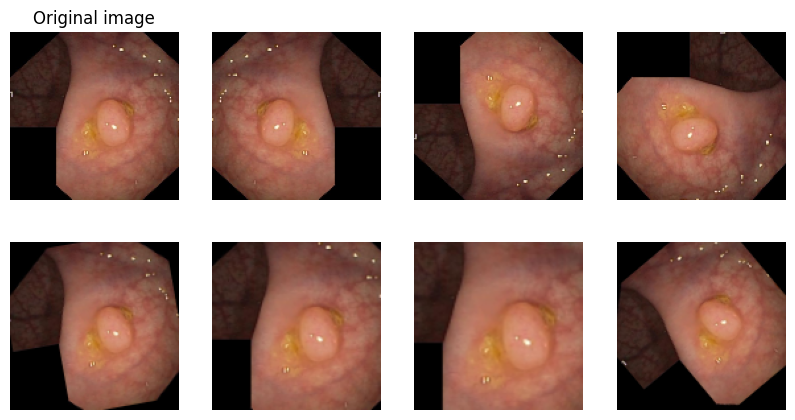

In [ ]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(2,4,1)
ax.axis('off')
ax.set_title('Original image')
ax.imshow(images_train[0])
ax=fig.add_subplot(2,4,2)
ax.axis('off')
ax.imshow(images_train[n_])
ax=fig.add_subplot(2,4,3)
ax.axis('off')
ax.imshow(images_train[2*n_])
ax=fig.add_subplot(2,4,4)
ax.axis('off')
ax.imshow(images_train[4*n_])
ax=fig.add_subplot(2,4,5)
ax.axis('off')
ax.imshow(images_train[8*n_])
ax=fig.add_subplot(2,4,6)
ax.axis('off')
ax.imshow(images_train[16*n_])
ax=fig.add_subplot(2,4,7)
ax.axis('off')
ax.imshow(images_train[32*n_])
ax=fig.add_subplot(2,4,8)
ax.axis('off')
ax.imshow(images_train[64*n_])
plt.show()

# **Transforming data to the format, necesarry for learning model**

In [ ]:
images_train,masks_train=shuffle(images_train,masks_train,random_state=1)

In [ ]:
BATCH_SIZE=256
images_train=tf.convert_to_tensor(images_train)
masks_train=tf.convert_to_tensor(masks_train)
images_val=tf.convert_to_tensor(images_val)
masks_val=tf.convert_to_tensor(masks_val)
images_test=tf.convert_to_tensor(images_test)
masks_test=tf.convert_to_tensor(masks_test)
train_data=tf.data.Dataset.from_tensor_slices((images_train,masks_train)).batch(BATCH_SIZE)
val_data=tf.data.Dataset.from_tensor_slices((images_val,masks_val)).batch(BATCH_SIZE)
test_data=tf.data.Dataset.from_tensor_slices((images_test,masks_test)).batch(BATCH_SIZE)

# **Realization of U-Net's encoder and decoder blocks**

In [ ]:
def encoder(In):
    In=tf.keras.layers.BatchNormalization()(In)
    x1=tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='leaky_relu',padding='same')(In)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='leaky_relu',padding='same')(x1)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x1)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x2=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='leaky_relu',padding='same')(x1)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='leaky_relu',padding='same')(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x3=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='leaky_relu',padding='same')(x2)
    x3=tf.keras.layers.BatchNormalization()(x3)
    x3=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='leaky_relu',padding='same')(x3)
    x3=tf.keras.layers.BatchNormalization()(x3)
    x3=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x3)
    x3=tf.keras.layers.BatchNormalization()(x3)
    x4=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='leaky_relu',padding='same')(x3)
    x4=tf.keras.layers.BatchNormalization()(x4)
    x4=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='leaky_relu',padding='same')(x4)
    x4=tf.keras.layers.BatchNormalization()(x4)
    x4=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x4)
    x4=tf.keras.layers.BatchNormalization()(x4)
    x5=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='leaky_relu',padding='same')(x4)
    x5=tf.keras.layers.BatchNormalization()(x5)
    x5=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='leaky_relu',padding='same')(x5)
    x5=tf.keras.layers.BatchNormalization()(x5)
    x5=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x5)
    x5=tf.keras.layers.BatchNormalization()(x5)
    return x1,x2,x3,x4,x5

In [ ]:
def decoder(In,convs):
  f1,f2,f3,f4,f5=convs
  x=tf.keras.layers.Conv2DTranspose(filters=128,kernel_size=(2,2),strides=(2,2),activation='leaky_relu',use_bias=False, padding='valid')(f5)
  x=tf.keras.layers.BatchNormalization()(x)
  f4=tf.keras.layers.Conv2D(filters=128,kernel_size=(1,1),activation='leaky_relu',padding='same')(f4)
  x=tf.keras.layers.Concatenate(axis=-1)([f4,x])
  x=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='leaky_relu',padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='leaky_relu',padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2DTranspose(filters=64,kernel_size=(2,2),strides=(2,2),activation='leaky_relu',use_bias=False, padding='valid')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  f3=tf.keras.layers.Conv2D(filters=64,kernel_size=(1,1),activation='leaky_relu',padding='same')(f3)
  x=tf.keras.layers.Concatenate(axis=-1)([f3,x])
  x=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='leaky_relu',padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='leaky_relu',padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2DTranspose(filters=32,kernel_size=(2,2),strides=(2,2),activation='leaky_relu',use_bias=False, padding='valid')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  f2=tf.keras.layers.Conv2D(filters=32,kernel_size=(1,1),activation='leaky_relu',padding='same')(f2)
  x=tf.keras.layers.Concatenate(axis=-1)([f2,x])
  x=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='leaky_relu',padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='leaky_relu',padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2DTranspose(filters=16,kernel_size=(2,2),strides=(2,2),activation='leaky_relu',use_bias=False, padding='valid')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  f1=tf.keras.layers.Conv2D(filters=16,kernel_size=(1,1),activation='leaky_relu',padding='same')(f1)
  x=tf.keras.layers.Concatenate(axis=-1)([f1,x])
  x=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='leaky_relu',padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='leaky_relu',padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2DTranspose(filters=8,kernel_size=(2,2),strides=(2,2),activation='leaky_relu',use_bias=False, padding='valid')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  In=tf.keras.layers.Conv2D(filters=8,kernel_size=(1,1),activation='leaky_relu',padding='same')(In)
  In=tf.keras.layers.BatchNormalization()(In)
  x=tf.keras.layers.Concatenate(axis=-1)([In,x])
  x=tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='leaky_relu',padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='leaky_relu',padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  output=tf.keras.layers.Conv2D(filters=1,kernel_size=(1,1),activation='sigmoid')(x)
  return output

# **Realization of a U-Net model**

In [ ]:
def segmentation_model(img_size):
    In=tf.keras.Input(shape=(img_size,img_size,3))
    convs=encoder(In)
    Out=decoder(In,convs)
    model=tf.keras.Model(inputs=In,outputs=Out,name='Polyp_segmentator')
    return model

In [ ]:
model=segmentation_model(img_size)
model.summary()

Model: "Polyp_segmentator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 3)  12         ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['batch_normalization[0][0]']    
                                )                                                 

# **Learning model**

As a metrics were chosen Accuracy and IoU for polyp class.

In [ ]:
EPOCHS=100
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-1),loss='binary_crossentropy',metrics=['Accuracy',tf.keras.metrics.BinaryIoU()])
es=tf.keras.callbacks.EarlyStopping(monitor='val_binary_io_u',min_delta=0,patience=2,restore_best_weights=True,mode='max')
history=model.fit(train_data,validation_data=val_data,epochs=EPOCHS,callbacks=[es])

Epoch 1/100
338/338 [==============================] - 145s 351ms/step - loss: 0.3491 - Accuracy: 0.8420 - binary_io_u: 0.6369 - val_loss: 0.2266 - val_Accuracy: 0.9124 - val_binary_io_u: 0.7102
Epoch 2/100
338/338 [==============================] - 115s 340ms/step - loss: 0.2154 - Accuracy: 0.9102 - binary_io_u: 0.7814 - val_loss: 0.1545 - val_Accuracy: 0.9366 - val_binary_io_u: 0.8069
Epoch 3/100
338/338 [==============================] - 115s 340ms/step - loss: 0.1589 - Accuracy: 0.9356 - binary_io_u: 0.8390 - val_loss: 0.1502 - val_Accuracy: 0.9390 - val_binary_io_u: 0.8145
Epoch 4/100
338/338 [==============================] - 115s 340ms/step - loss: 0.1256 - Accuracy: 0.9500 - binary_io_u: 0.8726 - val_loss: 0.1280 - val_Accuracy: 0.9491 - val_binary_io_u: 0.8363
Epoch 5/100
338/338 [==============================] - 115s 340ms/step - loss: 0.1043 - Accuracy: 0.9587 - binary_io_u: 0.8939 - val_loss: 0.1344 - val_Accuracy: 0.9506 - val_binary_io_u: 0.8465
Epoch 6/100
338/338 [====

In [ ]:
model.evaluate(val_data)

1/1 [==============================] - 0s 36ms/step - loss: 0.1266 - Accuracy: 0.9539 - binary_io_u: 0.8542


[0.12661212682724, 0.953900158405304, 0.8542076349258423]

# **Model's performance on a test data**

In [ ]:
model.evaluate(test_data)

1/1 [==============================] - 0s 40ms/step - loss: 0.1405 - Accuracy: 0.9582 - binary_io_u: 0.8685


[0.14054857194423676, 0.9581994414329529, 0.8685091733932495]

In [ ]:
masks_test=masks_test.numpy()

1/1 [==============================] - 1s 637ms/step


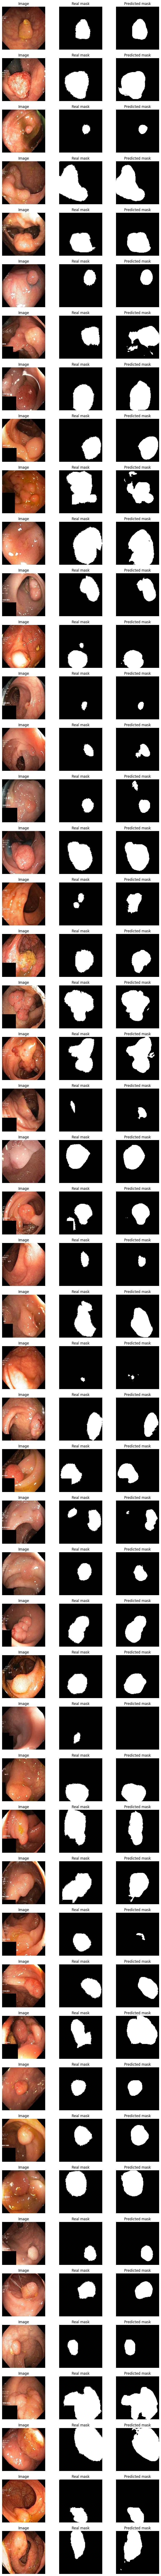

In [ ]:
numb=masks_test.shape[0]
masks_test[masks_test==1]=255
masks_pred=1*(model.predict(test_data)>0.5)
masks_pred[masks_pred==1]=255
fig=plt.figure(figsize=(10,10*(numb//3)))
for i in range(numb):
    ax1=fig.add_subplot(numb,3,3*i+1)
    ax1.axis('off')
    ax1.set_title('Image')
    ax1.imshow(images_test[i])
    ax2=fig.add_subplot(numb,3,3*i+2)
    ax2.axis('off')
    ax2.set_title('Real mask')
    ax2.imshow(masks_test[i],cmap='gray')
    ax3=fig.add_subplot(numb,3,3*i+3)
    ax3.axis('off')
    ax3.set_title('Predicted mask')
    ax3.imshow(masks_pred[i],cmap='gray')

# **Visualizing model's performance during learning**

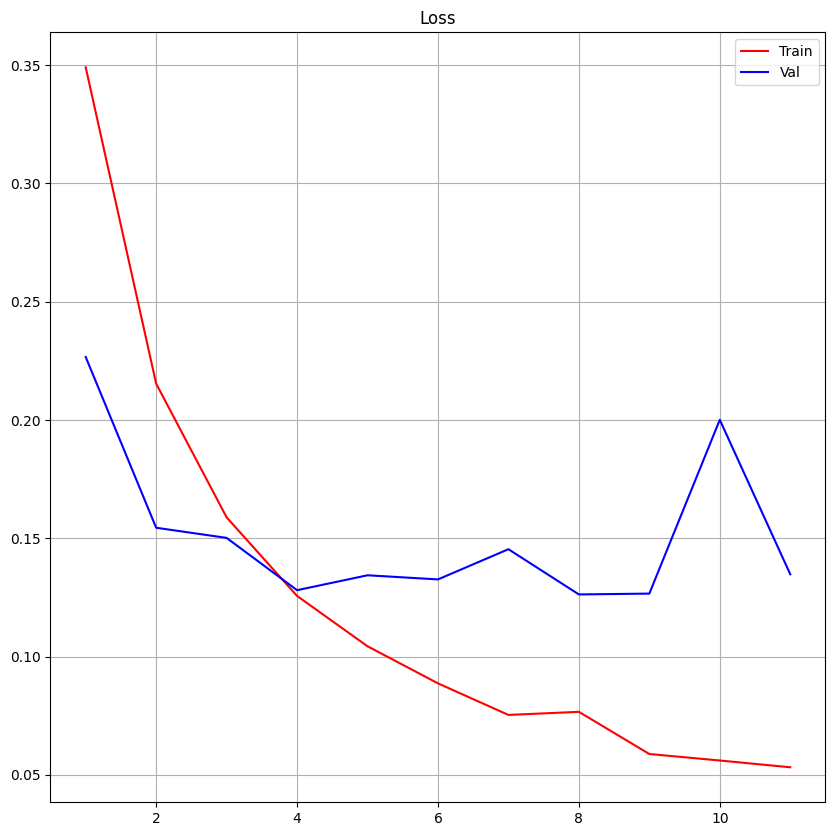

In [ ]:
epochs=[i for i in range(1,len(history.history['loss'])+1)]
loss=history.history['loss']
val_loss=history.history['val_loss']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.legend()
ax.grid()
plt.show()

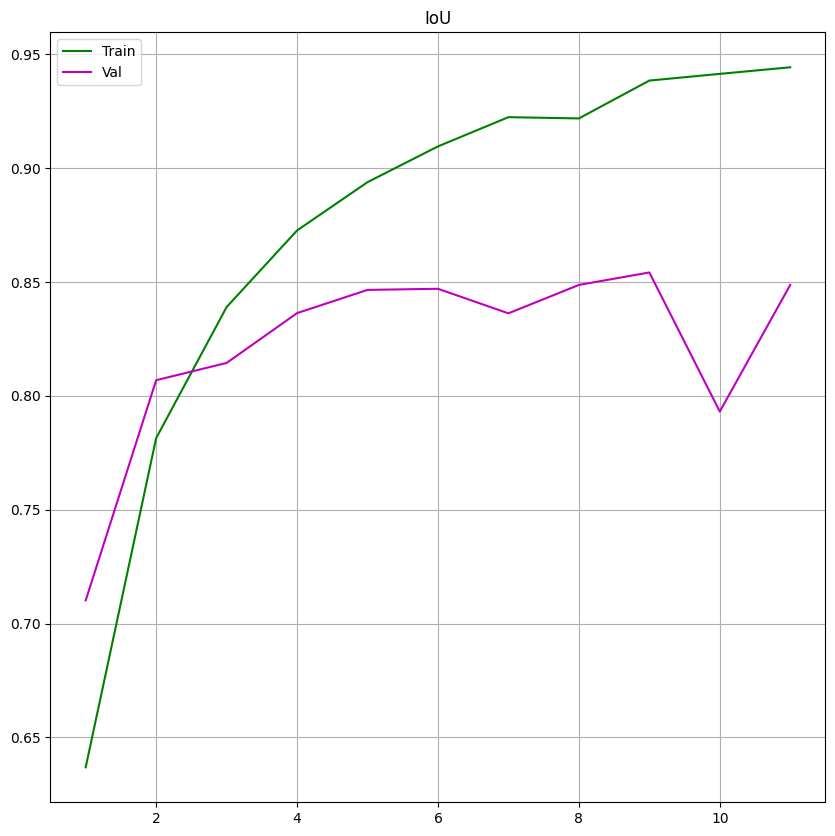

In [ ]:
epochs=[i for i in range(1,len(history.history['binary_io_u'])+1)]
IoU=history.history['binary_io_u']
val_IoU=history.history['val_binary_io_u']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('IoU')
ax.plot(epochs,IoU,color='g',label='Train')
ax.plot(epochs,val_IoU,color='m',label='Val')
ax.legend()
ax.grid()
plt.show()

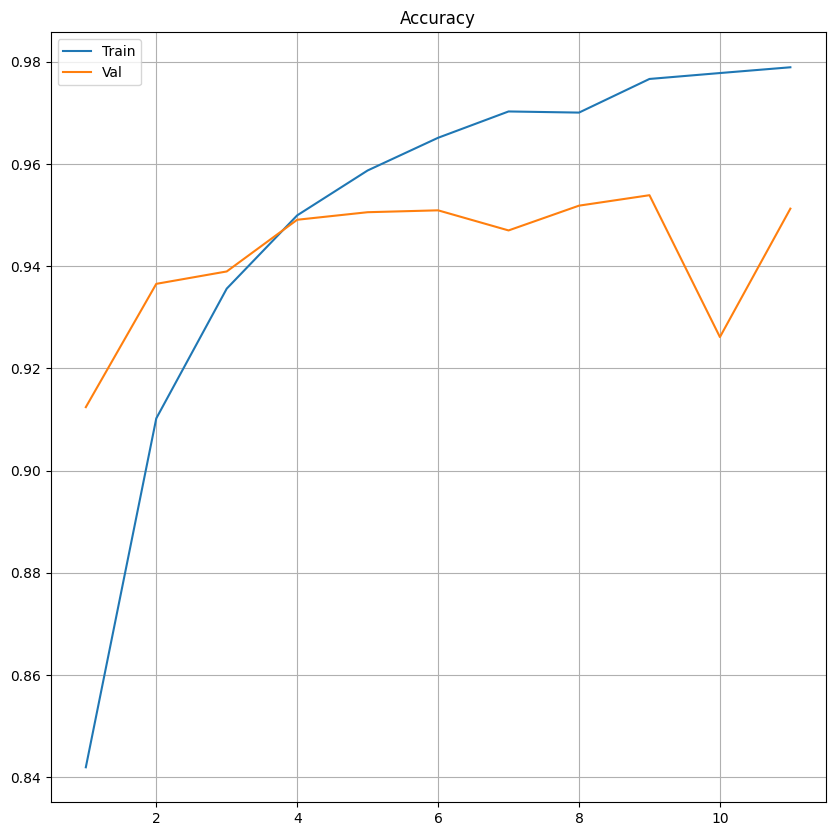

In [ ]:
epochs=[i for i in range(1,len(history.history['Accuracy'])+1)]
acc=history.history['Accuracy']
val_acc=history.history['val_Accuracy']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Accuracy')
ax.plot(epochs,acc,label='Train')
ax.plot(epochs,val_acc,label='Val')
ax.legend()
ax.grid()
plt.show()

# **Saving trained model**

In [ ]:
model.save('kaggle/working/model.h5')0

 # **Висновки**

Під час виконання лабораторної работи було навчено модель сегментації шлункових поліпів. За основу архітектури нейромережі було взято модель U-Net. Для покращення результатів було застосовано агугментація даних, за рахунок горизонтального та вертикального відзеркалювань, поворотів, наближень, та деякі їх комбінації. В результаті, на навчальній,валідаційній та тестовій вибірці відповідно було отримано значення точність 97.6%, 95.4%, 95.8% та значення IoU для класу поліпів 93.8%, 85.4%, 86.8%, що є доволі непоганими і прийнятними результатами.